In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Define the column names based on the order provided earlier
column_names = [
    'Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
    'Uniformity_of_cell_shape', 'Marginal_adhesion', 'Single_epithelial_cell_size',
    'Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'Class'
]

# Load the dataset without headers and assign column names
# Replace 'breast_cancer_data.csv' with the path to your dataset file
data = pd.read_csv('breast-cancer-wisconsin.data.csv', header=None, names=column_names)

# Display the first few rows of the dataset
print(data.head())

   Sample_code_number  Clump_thickness  Uniformity_of_cell_size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class  
0           1                3                1        1

In [6]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Replace '?' with NaN to handle missing values
data = data.replace('?', pd.NA)

# Check for missing values
print("Missing values before imputation:")
print(data.isnull().sum())

# Define feature columns and target column
features = [
    'Clump_thickness',
    'Uniformity_of_cell_size',
    'Uniformity_of_cell_shape',
    'Marginal_adhesion',
    'Single_epithelial_cell_size',
    'Bare_nuclei',
    'Bland_chromatin',
    'Normal_nucleoli',
    'Mitoses'
]
target = 'Class'

# Handle missing values
# Here, we replace missing values with the median of the column
imputer = SimpleImputer(strategy='median')

# Before applying imputation, ensure all feature columns are numeric
for feature in features:
    if data[feature].dtype == 'object':  # Check if the column is of object type
        data[feature] = pd.to_numeric(data[feature], errors='coerce')  # Convert to numeric, coercing errors to NaN

data[features] = imputer.fit_transform(data[features])

# Convert all columns to numeric type (if not already)
data = data.apply(pd.to_numeric, errors='ignore')  # Use errors='ignore' to skip columns that can't be converted

# Check again to ensure there are no missing values
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values in each column:
Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
Missing values before imputation:
Sample_code_number              0
Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
Missing values after imputation:
Sample_code_number             0
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape     

In [7]:
# Separate features and target variable
X = data[features]
y = data[target]

# Convert the target variable: 2 = benign (0), 4 = malignant (1)
y = y.map({2: 0, 4: 1})


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [8]:

print(X_train.head())

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
357              8.0                     10.0                      10.0   
648              5.0                     10.0                      10.0   
291              1.0                      1.0                       1.0   
420              3.0                      2.0                       2.0   
177              5.0                     10.0                      10.0   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
357                7.0                         10.0         10.0   
648               10.0                         10.0          2.0   
291                1.0                          2.0          1.0   
420                3.0                          2.0          3.0   
177                3.0                          8.0          1.0   

     Bland_chromatin  Normal_nucleoli  Mitoses  
357              7.0              3.0      8.0  
648             10.0             10.0     

                             Sample_code_number  Clump_thickness  \
Sample_code_number                     1.000000        -0.055308   
Clump_thickness                       -0.055308         1.000000   
Uniformity_of_cell_size               -0.041603         0.644913   
Uniformity_of_cell_shape              -0.041576         0.654589   
Marginal_adhesion                     -0.064878         0.486356   
Single_epithelial_cell_size           -0.045528         0.521816   
Bare_nuclei                           -0.092533         0.590008   
Bland_chromatin                       -0.060051         0.558428   
Normal_nucleoli                       -0.052072         0.535835   
Mitoses                               -0.034901         0.350034   
Class                                 -0.080226         0.716001   

                             Uniformity_of_cell_size  \
Sample_code_number                         -0.041603   
Clump_thickness                             0.644913   
Uniformity_of_c

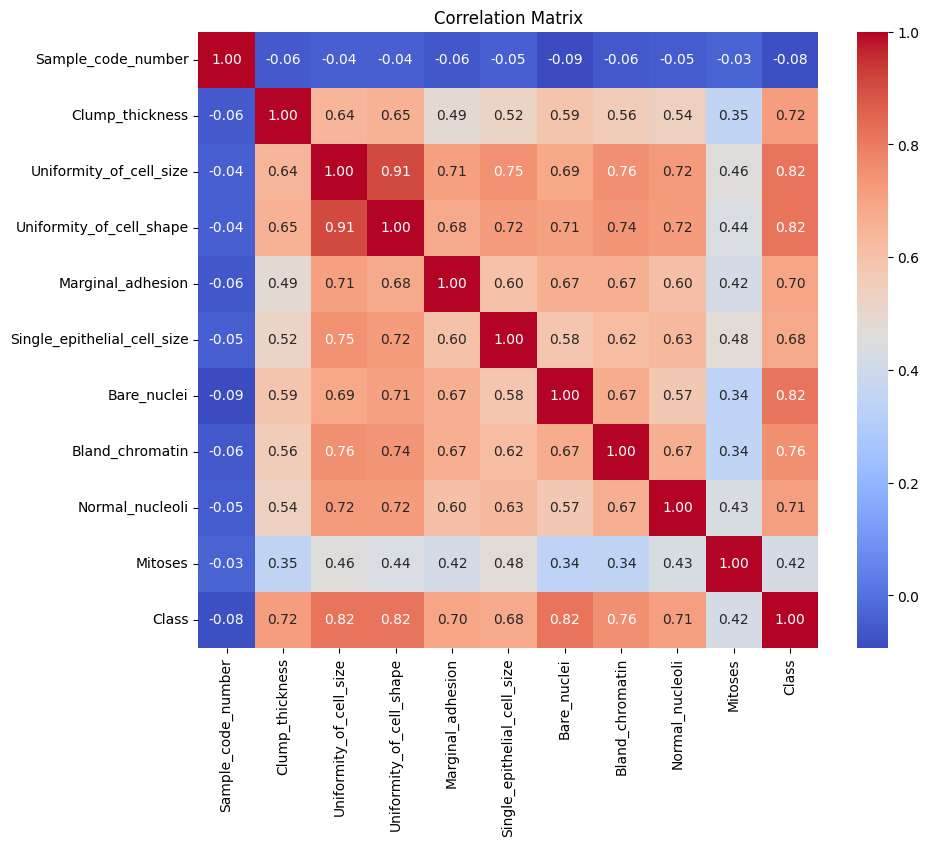

In [10]:
import matplotlib.pyplot as plt

import seaborn as sns
correlation_matrix = data.corr()
# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

Accuracy: 0.97
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       143
   Malignant       0.97      0.93      0.95        67

    accuracy                           0.97       210
   macro avg       0.97      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210

